## Exemples de calcul de la capacité en Matlab
-----------------------------------------------

### 1. Capacité du canal Gaussien à entrées gaussiennes
--------------------------------------------------------

La capacité pour une entrée non contrainte est donnée par la capacité d'un canal Gaussien complexe à temps discret avec une énergie moyenne par symbole $\mathrm{E}_{\mathrm{s}}$ et une variance par dimension $\sigma^{2}=\mathrm{N_0} / 2$  est donnée par

$$
C_{AWGN}=\log_2 \left(1+\frac{E_{s}}{2 \sigma^{2}}\right)=\log_2 \left(1+\frac{E_{s}}{N_0}\right) \text { [bits/channel use] or [bits/symbol], }
$$

Pour les $E_s/N_0$ faibles (régime limité en puissance), on a 

$$
\begin{aligned}
\mathrm{C}_{\textrm{AWGN }} &=\log_2(1+E_s/N_0) \\
&\approx \frac{1}{\ln 2} \cdot E_s/N_0.
\end{aligned}
$$

On a donc un régime linéaire. A contrario, pour les forts $E_s/N_0,$ on a un régime logarithmique, ie.

$$
\mathrm{C}_{\textrm{AWGN }} \approx \log_2(E_s/N_0)
$$

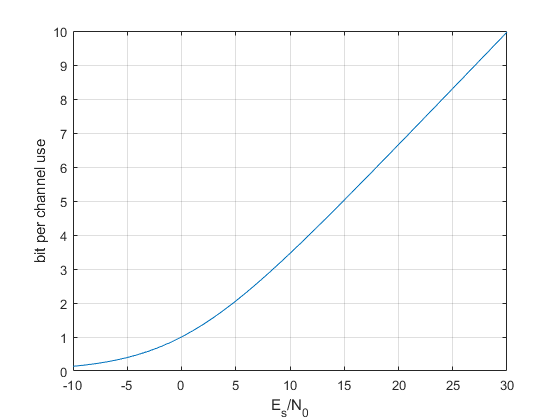

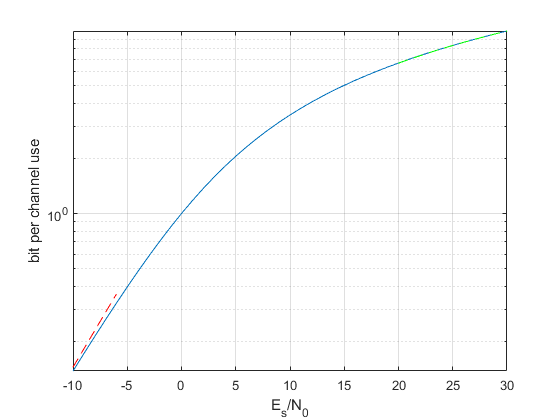

In [3]:
EsN0dB=(-10:30);
EsN0=10.^(EsN0dB/10);
ShannonCapacity=log2(1+EsN0);

%Capa vs SNR - linear scale
figure
plot(EsN0dB,ShannonCapacity);
grid on

xlabel('E_s/N_0')
ylabel('bit per channel use')


%Capa vs SNR - log scale
figure
semilogy(EsN0dB,ShannonCapacity);
hold on
semilogy(EsN0dB(1:5), (EsN0(1:5))/log(2),'r--')
semilogy(EsN0dB(end-10:end), log2(EsN0(end-10:end)),'g--')
grid on

xlabel('E_s/N_0')
ylabel('bit per channel use')



Quand on regarde la capacité en fonction de $E_b/N_0$, on obtient 

$$C_{AWGN}=\log_2(1 + R \frac{E_b}{N_0})$$

où $E_b$ est l'énergie par bit utile/d'information. On a alors 

$$
\frac{E_{b}}{N_{0}}>\frac{2^{R}-1}{R} \underset{R \to 0}{\longrightarrow}  \ln(2)=-1.59 dB.
$$

En prenant, le rendement comme étant le sup atteignable, ie. $R^*= C_{AWGN},$ on peut tracer la limite de Shannon en fonction de $\frac{E_{b}}{N_{0}}.$

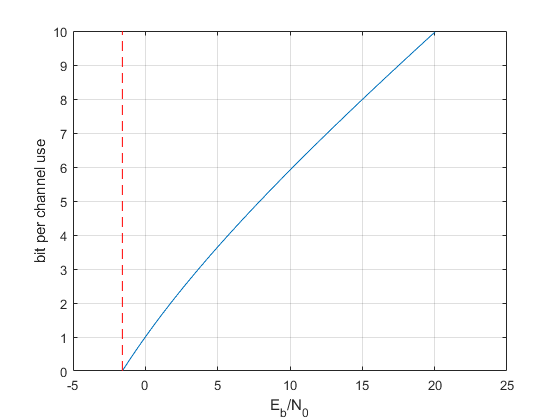

In [5]:
%Capa vs Eb/N0 - linear sacle
EsN0dB=(-100:30);
EsN0=10.^(EsN0dB/10);
ShannonCapacity=log2(1+EsN0);

figure
plot(EsN0dB-10*log10(ShannonCapacity),log2(1+EsN0));
hold on 
plot([-1.59,-1.59+eps],[0, 10],'r--');

grid on

xlabel('E_b/N_0')
ylabel('bit per channel use')

### 2. Capacité du canal Gaussien à entrées binaires
-------------------------------------------------------

Soit le modèle de réception suivant:

$$y[n]=x[n]+b[n],$$

où $x[n] \in\{-1,+1\}.$
par définition, la capacité à entrée binaire est fournie par

$$
I(X ; Y)=\frac{1}{2} \sum_{x=\pm 1} \int_{\mathbb{R}} f(y \mid x) \log _{2}\left(\frac{2 f(y \mid x)}{f(y \mid x=+1)+f(y \mid x=-1)}\right) dy
$$

En utilisant le fait que 

$$I(X ; Y)=H(X)-H(X|Y),$$

on peut écrire 

$$I(X ; Y)=1+\mathbb{E}_{X,Y}(\log_2(p(X \mid Y))).$$

On peut alors introduire la quantité suivante (LLR)

$$L(y)=\log{\left(\frac{p(x=+1 | Y = y)}{p(x=-1 | Y =y)}\right)}.$$

En utilisant le fait que ${p(x=+1 | y)}+{p(x=-1 | y)}=1,$ il vient

$$
\begin{eqnarray}
p(x =+1 | {y}) & = & \frac{e^{L(y)}}{1+e^{L(y)}} \\
&=& \frac{1}{1+e^{-L(y)}} \nonumber \\
& &\nonumber \\
p(x =-1 | {y}) & = & \frac{1}{1+e^{L(y)} }
\end{eqnarray}
$$

Ce qui permet d'écrire $$p(x | {y})  =  \frac{1}{1+e^{-x L(y)}}$$

Par intégration de Monte-Carlo, on obtient alors un estimateur empirique non biasé simple donné par

$$\hat{I}(X ; Y)=1+\frac{1}{N}\sum_{n=0}^{N-1}{\log_2(p(x[n] \mid y[n]))}=1-\frac{1}{N}\sum_{n=0}^{N-1}{\log_2(1+e^{-x[n] L(y[n])})}.$$



Capacity =

    0.5002




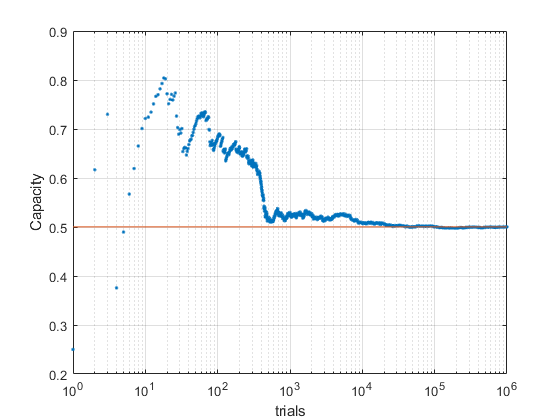

In [7]:
clear all;

%%%%
EbN0db=0.187;
N=1000000;
bits=randn(1,N)>0;
BPSK=1-2*bits;
R=0.5;
N0=1/R/10^(EbN0db/10);

bruit=sqrt(N0/2)*randn(1,N);
sigma2=N0/2;
y=BPSK+bruit;

LLR=2/sigma2*y;

%Capacity for Eb/N0=0.2dB
Capacity=1-mean(log2(1+exp(-BPSK.*LLR)))

%convergence of mean estimator
CapacityPartial=1-1./(1:N).*cumsum(log2(1+exp(-BPSK.*LLR)));
semilogx((1:N),CapacityPartial,'.')
hold on
semilogx((1:N),CapacityPartial(end)*ones(1,N),'-')

grid on
xlabel('trials')
ylabel('Capacity')

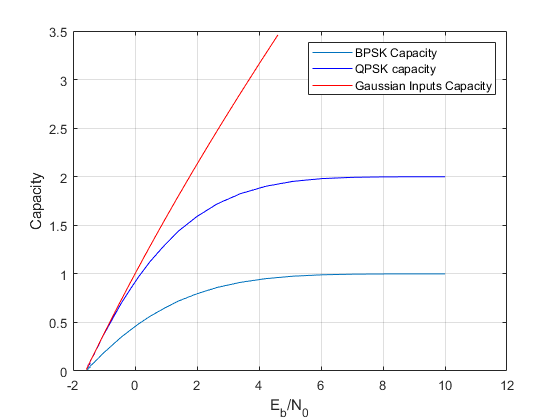

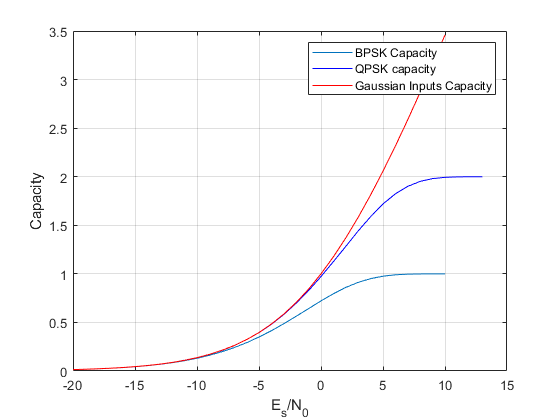

In [9]:
ESN0db=(-20:10);
N=5000000;

for snr=1:numel(ESN0db)

bits=randn(1,N)>0;
BPSK=1-2*bits;
N0=1/10^(ESN0db(snr)/10);
bruit=sqrt(N0/2)*randn(1,N);
sigma2=N0/2;
y=BPSK+bruit;

LLR=2/sigma2*y;

%Capacity for Eb/N0=0.2dB
Capacity(snr)=1-mean(log2(1+exp(-BPSK.*LLR)));
end
figure
plot(ESN0db-10*log10(Capacity),Capacity)
hold on
plot(ESN0db+10*log10(2)-10*log10(2*Capacity),2*Capacity,'b-')
plot(ESN0db-10*log10(log2(1+10.^(ESN0db/10))),log2(1+10.^(ESN0db/10)),'r-')
grid on
xlabel('E_b/N_0')
ylabel('Capacity')
legend('BPSK Capacity','QPSK capacity','Gaussian Inputs Capacity')

figure
plot(ESN0db,Capacity)
hold on
plot(ESN0db+10*log10(2),2*Capacity,'b-')
plot(ESN0db,log2(1+10.^(ESN0db/10)),'r-')
grid on
xlabel('E_s/N_0')
ylabel('Capacity')
legend('BPSK Capacity','QPSK capacity','Gaussian Inputs Capacity')


### 3. Capacité du canal Gaussien à entrées non binaires
---------------------------------------------------
La capacité pour une entrée contrainte non binaire est donnée par

$$
\mathrm{C}=\mathrm{I}(X ; Y)=\frac{1}{M}\sum_{x \in\mathcal{X}}\int p(y|x) \log_2 \frac{p(y|x)}{\frac{1}{M} \sum_x p(y|x)} dy.
$$

#### Calcul par intégration de Monté Carlo
Contrairement, au cas précédent, même pour un canal de type AWGN, il n'existe pas d'expression analytique plus simple que cette formulation intégrale. Il faut donc pour un canal particulier calculer l'expression intégrale par intégration numérique ou de Monte-Carlo. Pour calculer efficacement cette capacité, cela revient à évaluer $\mathbf{C} = I({X};{Y}) = H({X})-H({X}\mid{Y})$ au travers des Termes $H({X})$ ou $H({X}\mid{Y}).$ Voilà alors les différentes étapes pour calculer la capacité


1. **Calcul  de $H({X})$ :** 

En considérant que le maximum est atteint pour une distribution uniforme des symboles d'entrée, on obtient facilement que $$H({X})=\log_2(M).$$

2. **Calcul  de $H({X}\mid{Y})$ :**

$$H({X}\mid{Y})= - \mathbb{E}_{X,Y}{\log_2{p(X | Y)}} =  \mathbb{E}({h(X | Y)})$$

On doit donc calculer le terme $h(X | Y)=-\log_2{(p(X | Y))}.$ Ceci est aisément obtenu en considérant la vraisemblance du canal de la manière suivante  

$$ p(X | Y) =  \frac{p(Y|X)}{\sum_{x \in \mathcal{X}}{p(Y|X=x)}}.$$

Le calcul de $H({X}\mid{Y})$ peut alors se faire par Monte-Carlo en utilisant un estimateur asymptotiquement sans biais de cette quantité. En effet, par ergodicité, on a 

$$H({X}\mid{Y})= \mathbb{E}({{h(X | Y)}}) = \lim_{N \rightarrow +\infty}\frac{1}{N} \sum_{n}{h(x(n)| y(n))}$$

où $h(x(n)| y(n))=-\log_2(p(x(n) | y(n)))).$

La procédure globale pour l'estimation par monte-Carlo peut alors se résumé comme suit

a. Tirer aléatoirement et uniformément des symboles issue de la constellation,

b. Calculer pour chaque couple $(x(n),y(n))$, $h(x(n) | y(n))$ et moyenner.


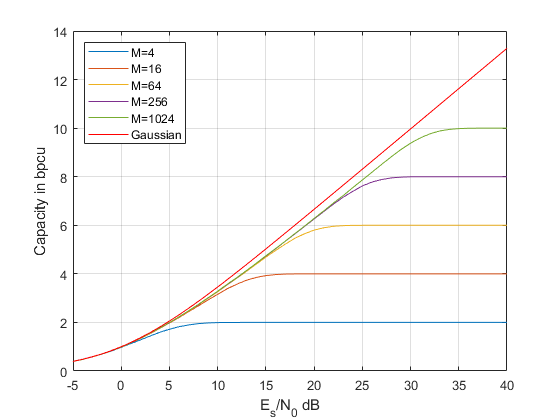

In [10]:
% Simulation parameters
Ns= 100000;                  % Number of Symbols 
Es_N0_dB =  (-5:40);

%loop for order M
for M = [4 16 64 256 1024];                     % Constellation Order
Constellation=qammod((0:M-1)',M);
% Loop variable for SNR
% Monte carlo parameter
    
for snr=1:numel(Es_N0_dB)
    %generate M-QAM modulation
    
    s = randi([0 M-1],Ns,1);
    x = qammod(s, M);
    
    Es_N0=10^(Es_N0_dB(snr)/10);%normal
    sigx2=var(x);
    N0  = sigx2 /(Es_N0);
    
    %add noise
    noise_  = sqrt(N0/2 )*randn(length(x),1)+ ...
                1j*sqrt(N0/2 )*randn(length(x),1);
    sig_rx  =  x + noise_ ;
    
    %Compute Capacity
    %%Entropy
    Hx=log2(M);
    %%Conditionnal Entropy
    xref=repmat(Constellation,1,Ns);       %
    d2=-abs((repmat(sig_rx,1,M).'-xref)).^2/N0;
    PYX=exp(d2);
    PYx=exp(-abs((sig_rx-Constellation(s+1))).^2/N0);
    PxY=PYx./(sum(PYX)');
    HXY=-mean(log2(PxY'));
    ConstrainedCapacity(snr)=Hx-HXY;
end

plot(Es_N0_dB,ConstrainedCapacity)

hold on 

end

plot(Es_N0_dB,log2(1+10.^(Es_N0_dB/10)),'r-')
legend({'M=4','M=16','M=64','M=256','M=1024','Gaussian'},'Location','northwest')
xlabel('E_s/N_0 dB')
ylabel('Capacity in bpcu')
grid on

### 3.2 A vous de jouer...

1. Déterminer les capacités pour des signaux PSK et APSK et QAM-(8,32,128). Conclure.
2. Regarder ces résultats en regardant la capacité versus $E_b/N_0$.